[*********************100%***********************]  1 of 1 completed


Ticker           AAPL
Date                 
2022-01-03  104487900
2022-01-04   99310400
2022-01-05   94537600
2022-01-06   96904000
2022-01-07   86709100
...               ...
2024-12-11   45205800
2024-12-12   32777500
2024-12-13   33155300
2024-12-16   51665600
2024-12-17   20593834

[744 rows x 1 columns]


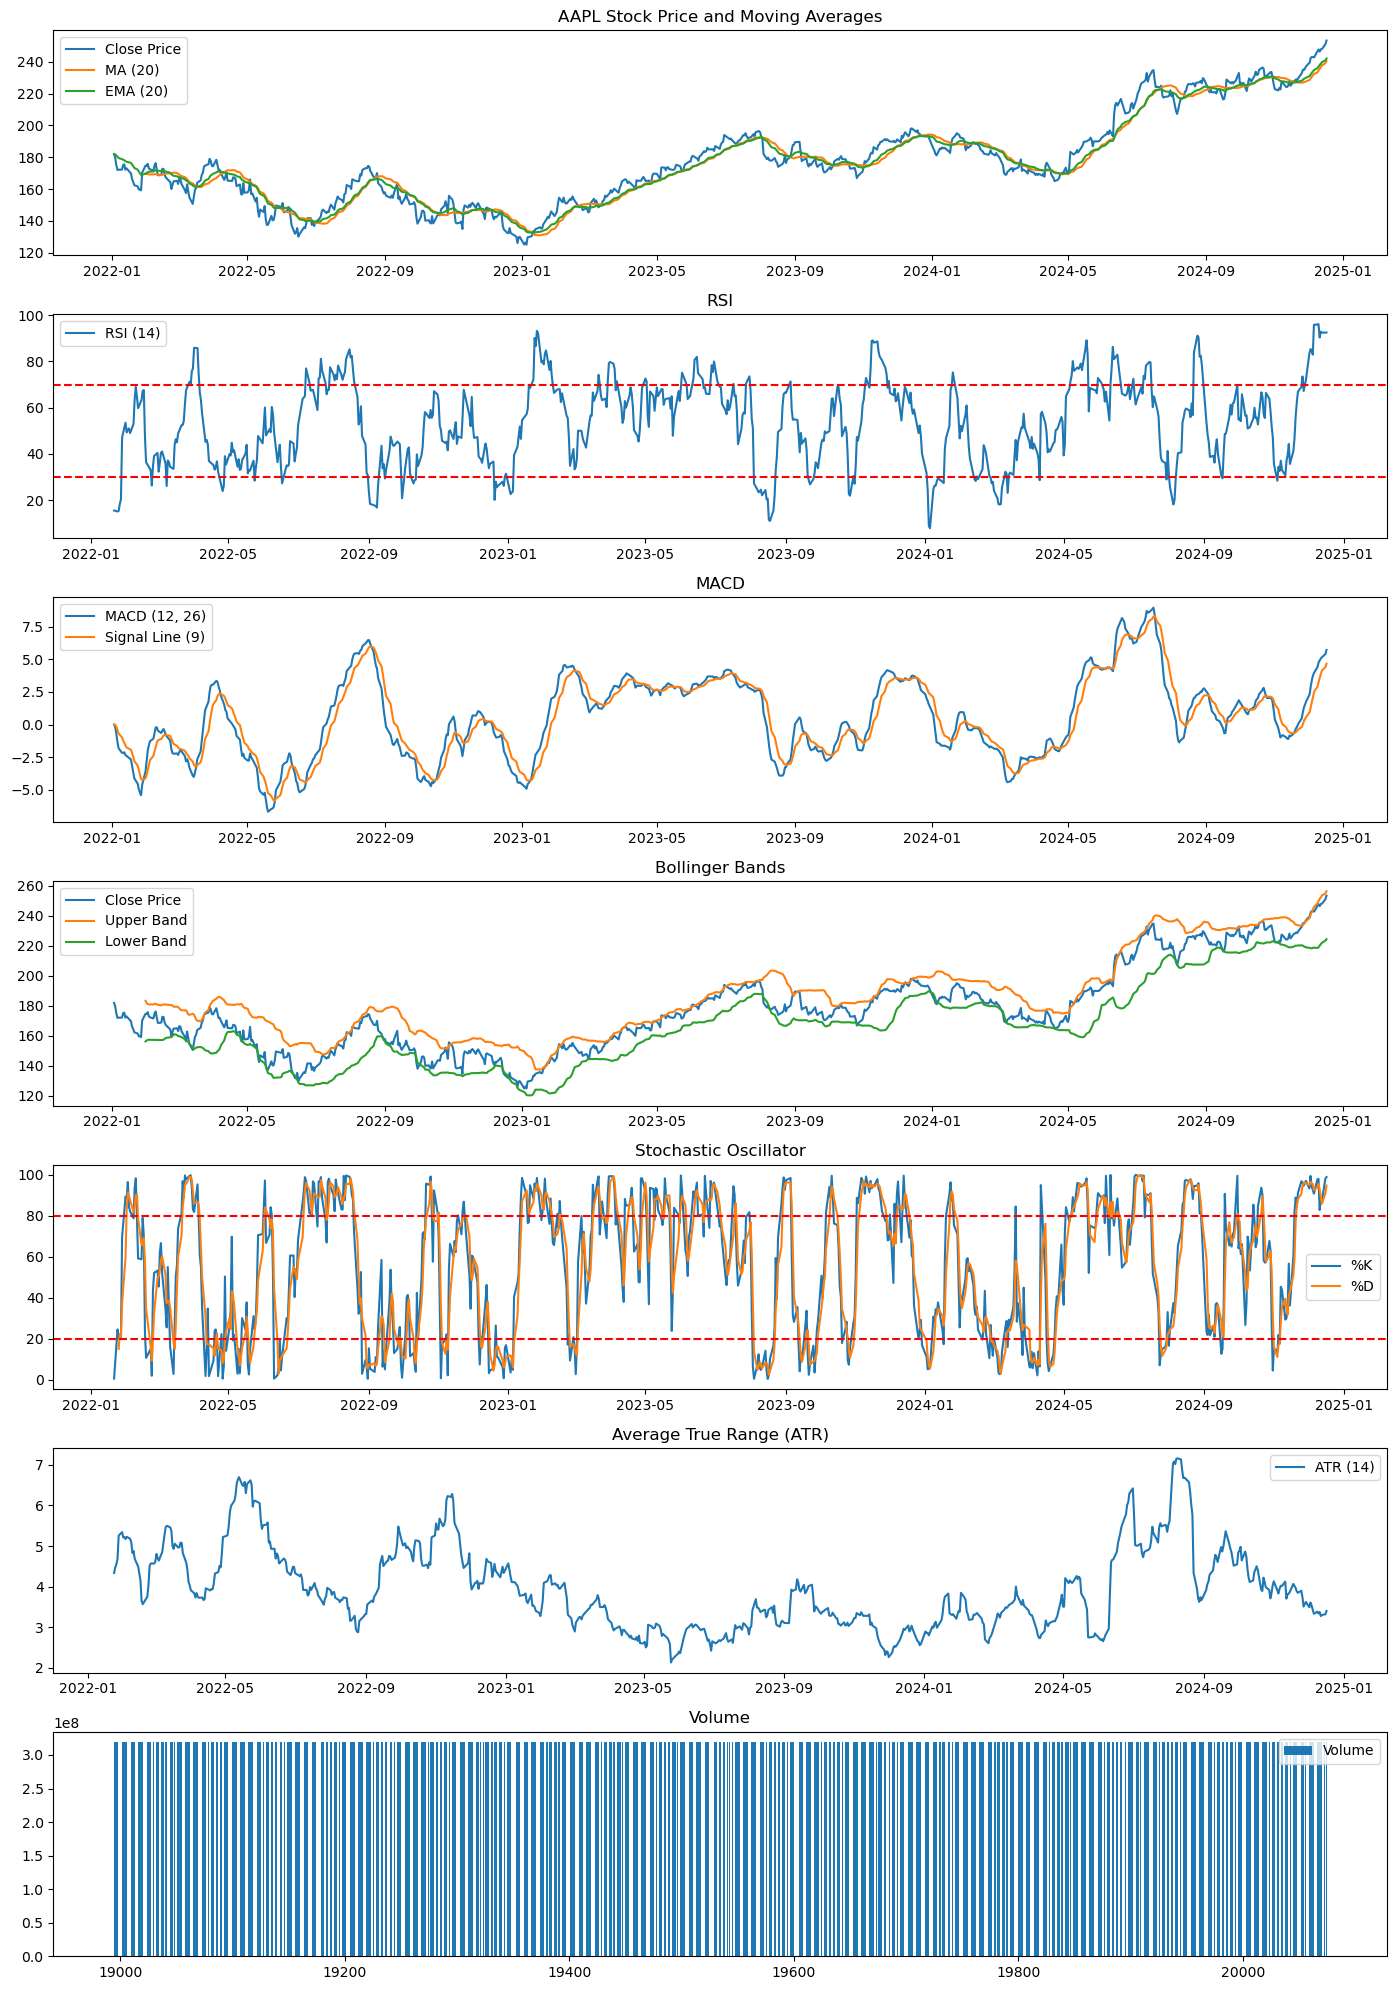

[*********************100%***********************]  1 of 1 completed


Ticker          MSFT
Date                
2022-01-03  28865100
2022-01-04  32674300
2022-01-05  40054300
2022-01-06  39646100
2022-01-07  32720000
...              ...
2024-12-11  19200200
2024-12-12  20834800
2024-12-13  20177800
2024-12-16  23586700
2024-12-17   8297099

[744 rows x 1 columns]


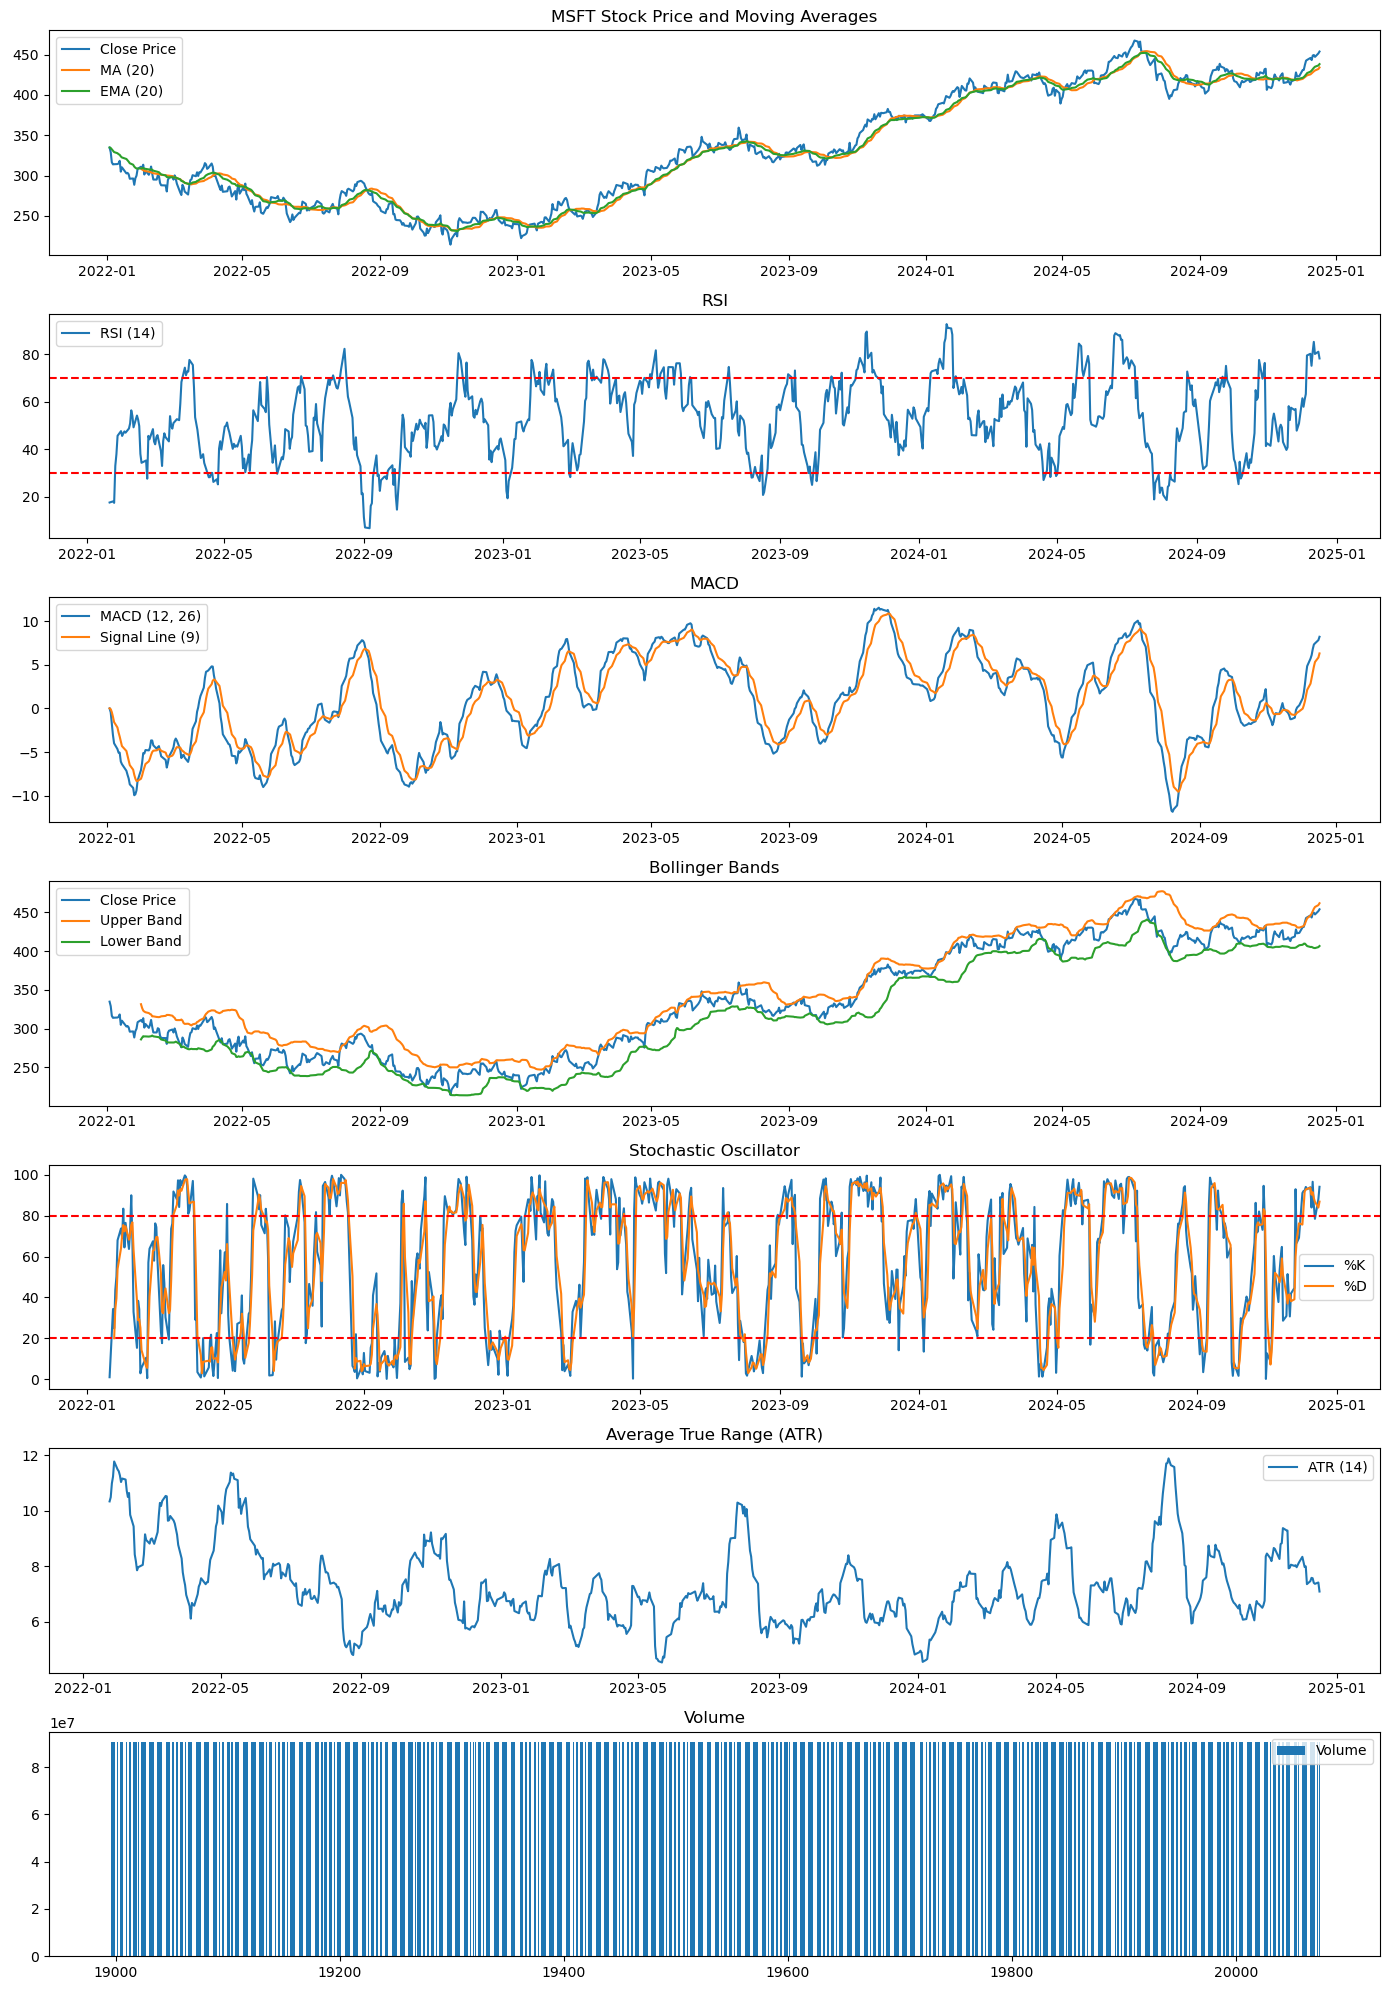

[*********************100%***********************]  1 of 1 completed


Ticker           NVDA
Date                 
2022-01-03  391547000
2022-01-04  527154000
2022-01-05  498064000
2022-01-06  454186000
2022-01-07  409939000
...               ...
2024-12-11  184905200
2024-12-12  159211400
2024-12-13  231514900
2024-12-16  236863700
2024-12-17  180102605

[744 rows x 1 columns]


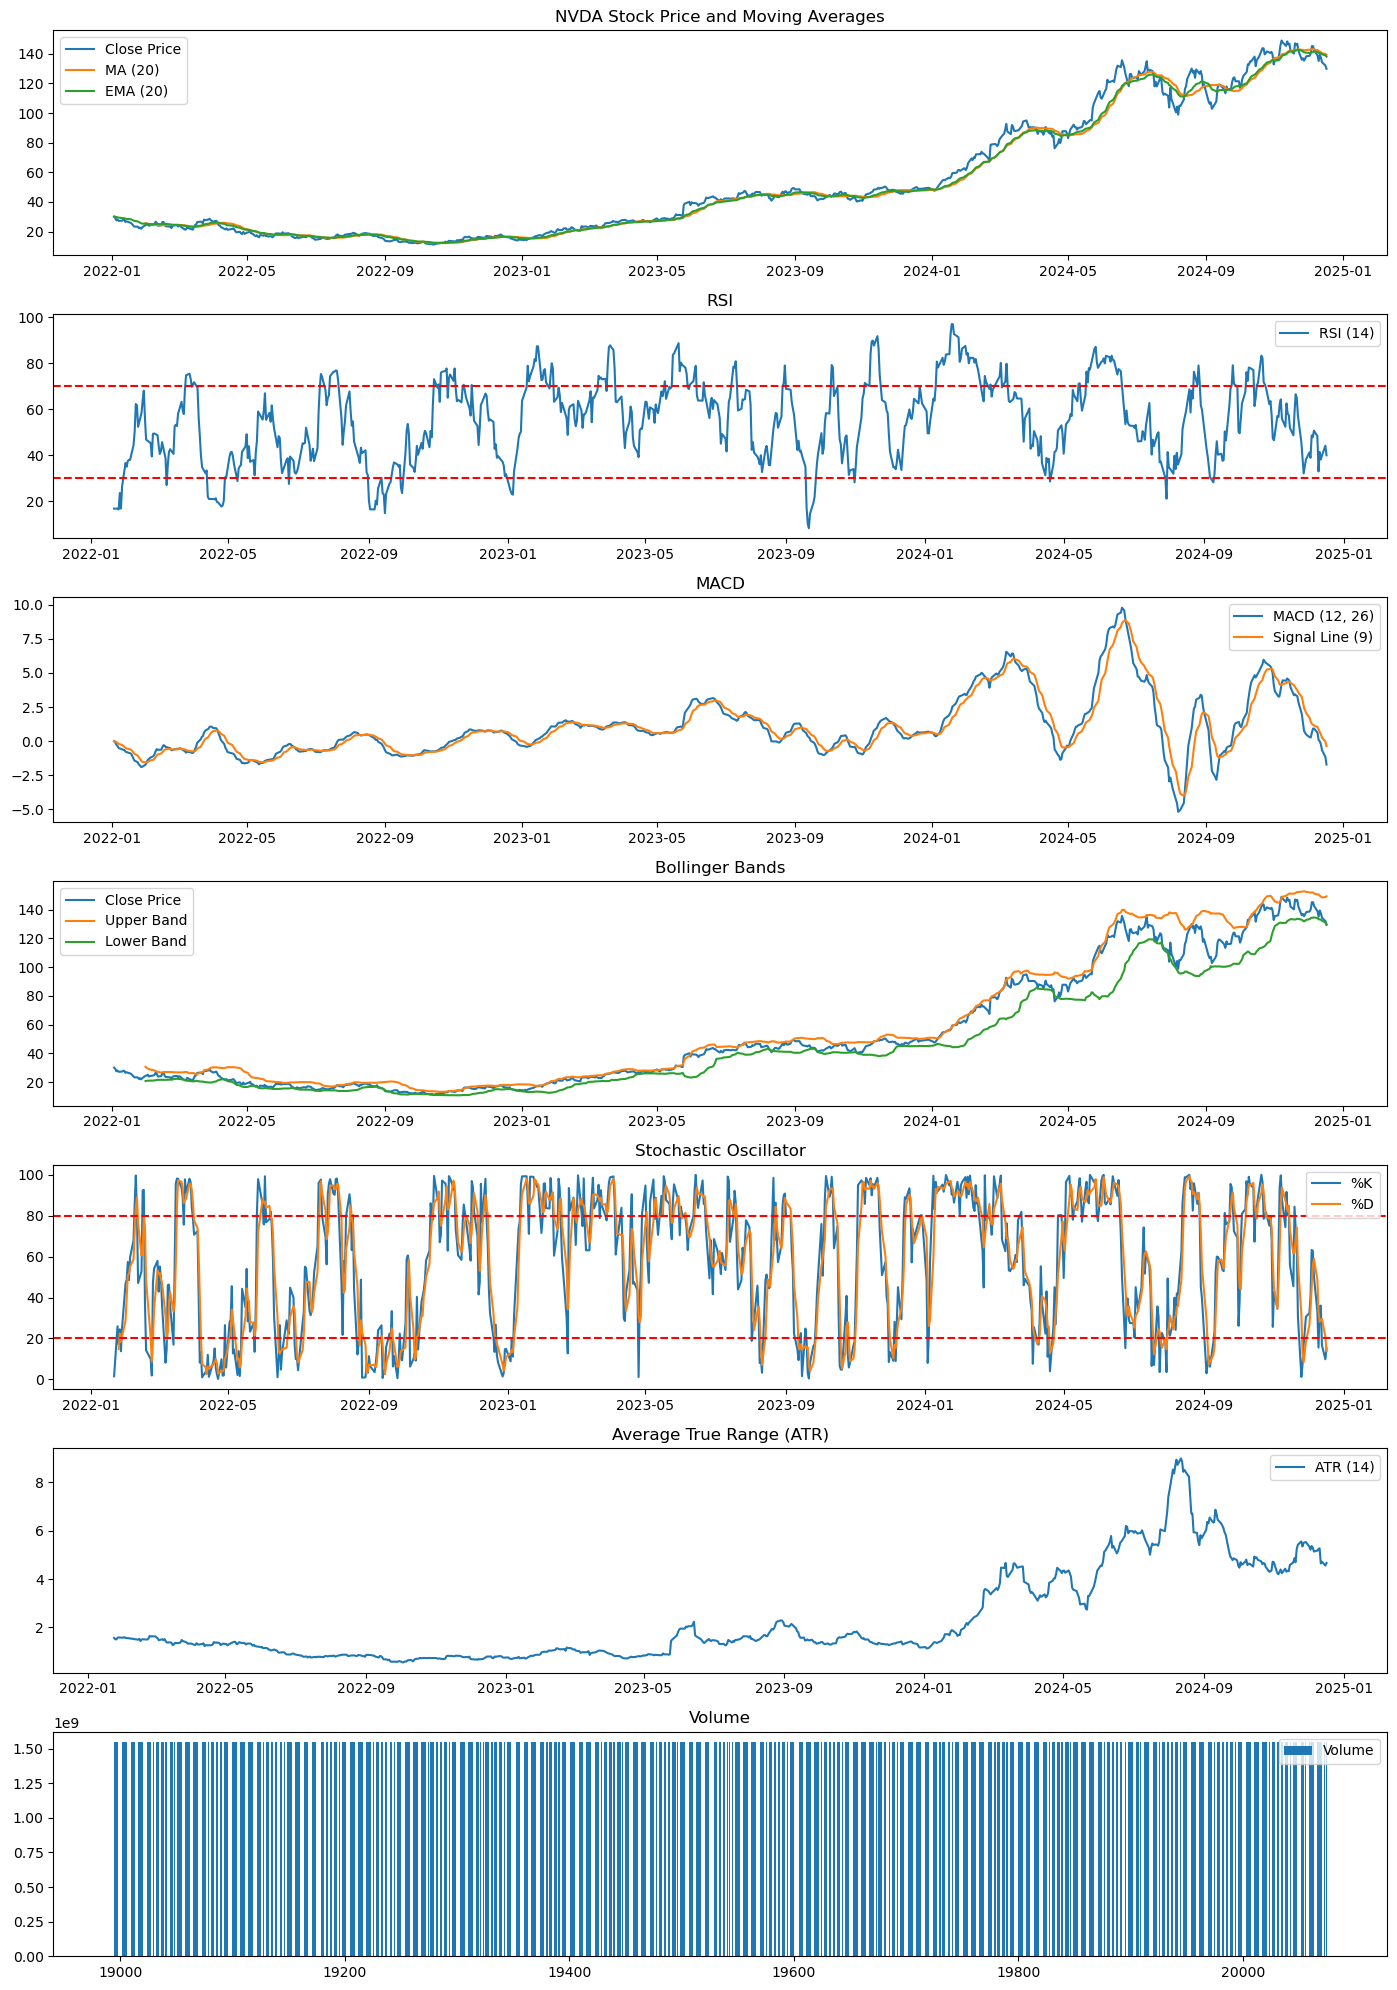

[*********************100%***********************]  1 of 1 completed


Ticker          ROK
Date               
2022-01-03   638200
2022-01-04   588200
2022-01-05   578100
2022-01-06   453500
2022-01-07   613400
...             ...
2024-12-11   804800
2024-12-12  1332400
2024-12-13  1307800
2024-12-16   794500
2024-12-17   410984

[744 rows x 1 columns]


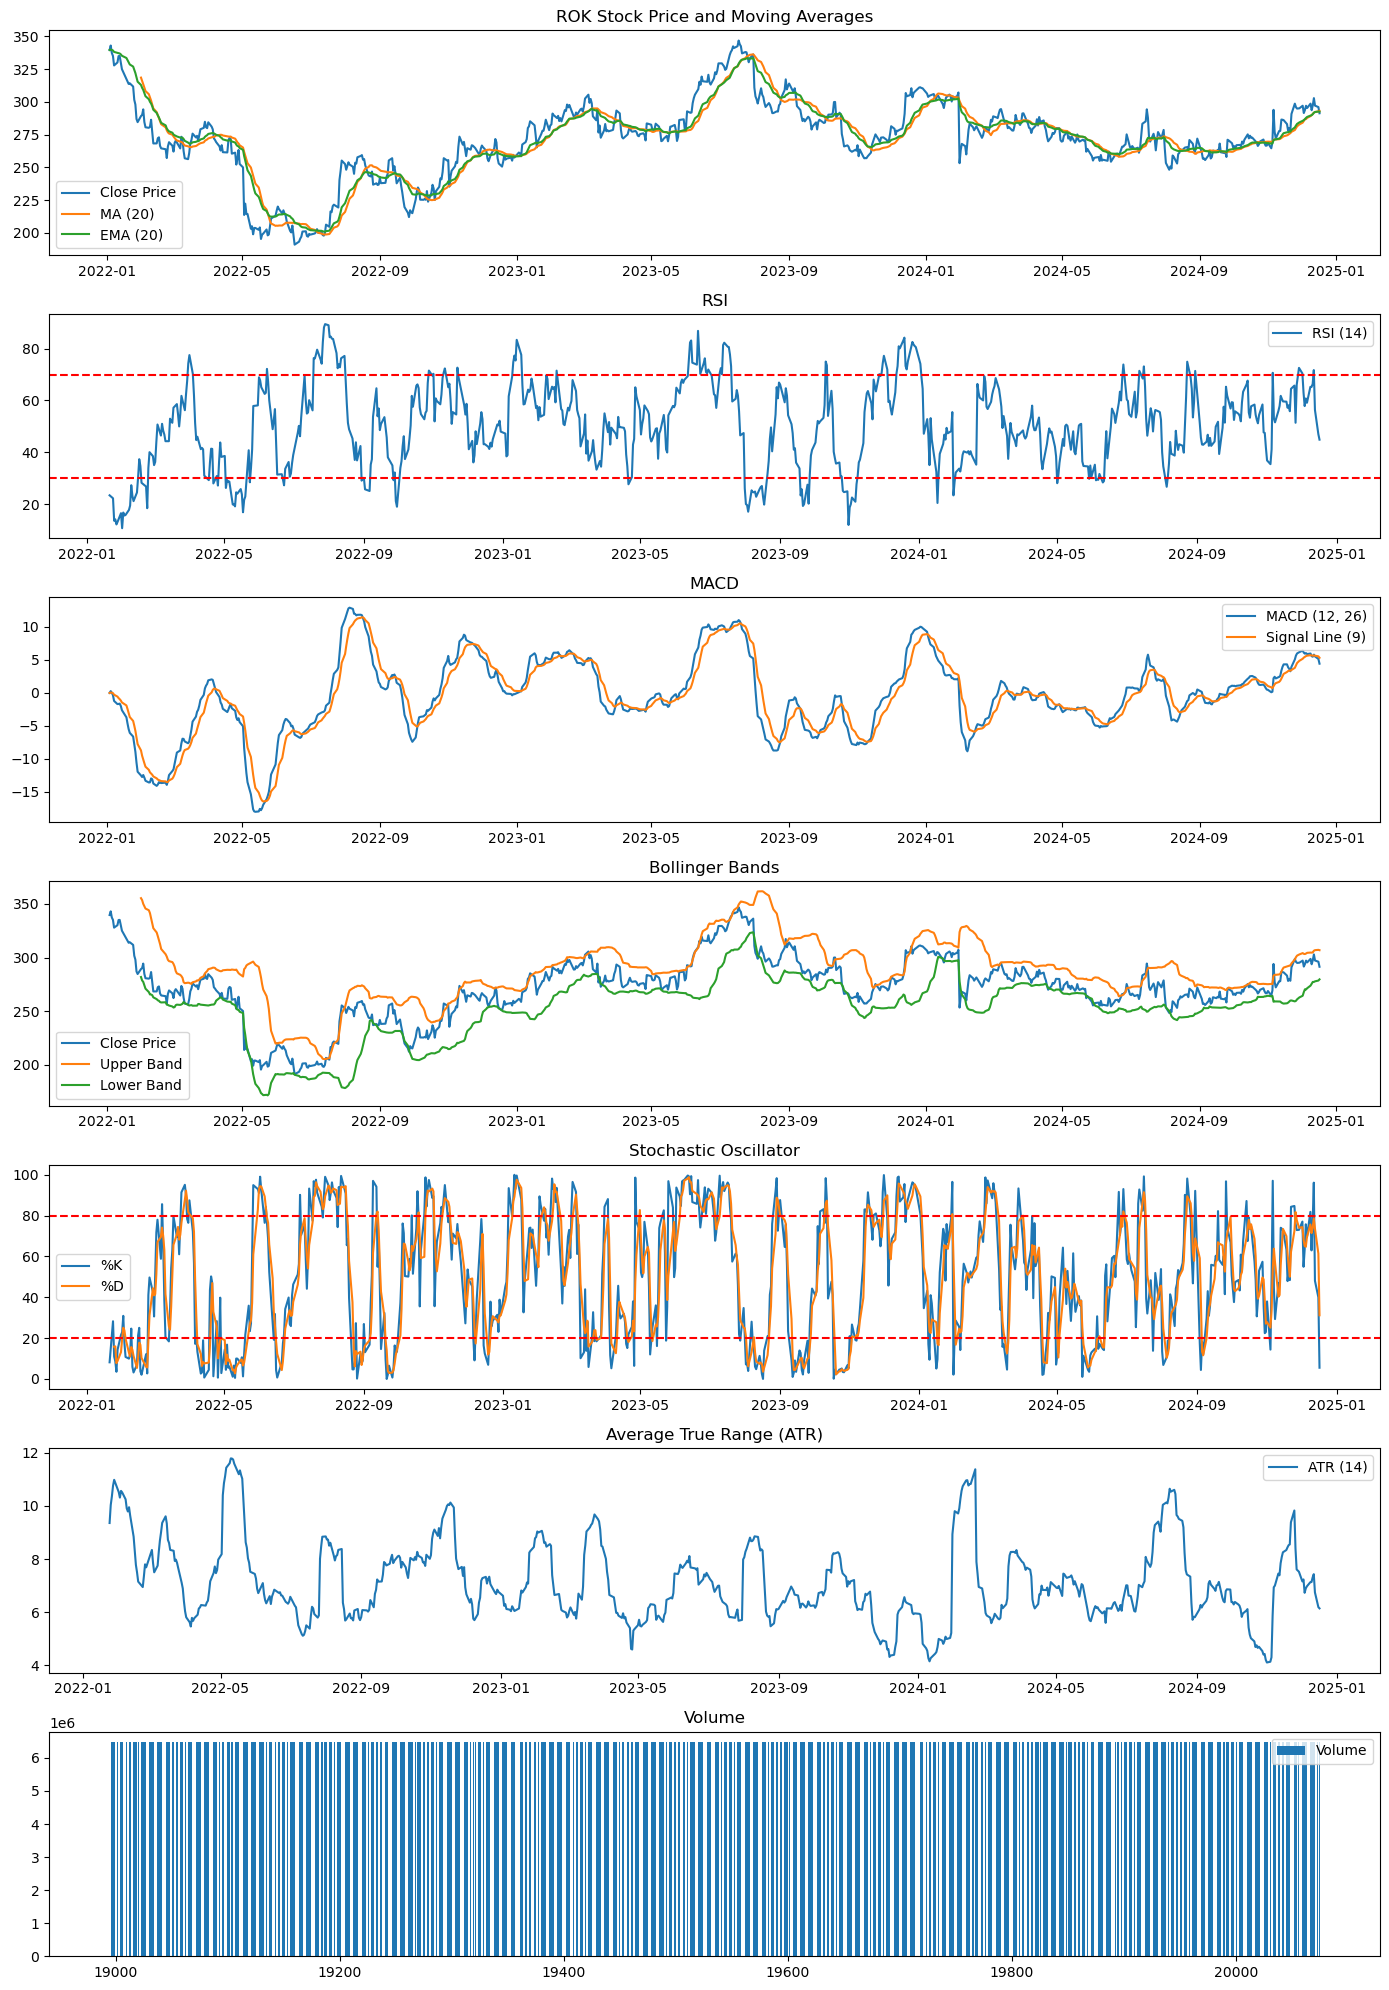

In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

def fetch_data(ticker, start_date, end_date):
    return yf.download(ticker, start=start_date, end=end_date)

def calculate_ma(data, window=20):
    data['MA'] = data['Close'].rolling(window=window).mean()
    return data

def calculate_ema(data, span=20):
    data['EMA'] = data['Close'].ewm(span=span, adjust=False).mean()
    return data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

def calculate_macd(data, span_short=12, span_long=26, span_signal=9):
    data['MACD'] = data['Close'].ewm(span=span_short, adjust=False).mean() - data['Close'].ewm(span=span_long, adjust=False).mean()
    data['Signal Line'] = data['MACD'].ewm(span=span_signal, adjust=False).mean()
    return data

def calculate_bollinger_bands(data, window=20):
    data['Rolling_STD'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['MA'] + (2 * data['Rolling_STD'])
    data['Lower Band'] = data['MA'] - (2 * data['Rolling_STD'])
    return data

def calculate_stochastic_oscillator(data, window=14):
    low_min = data['Low'].rolling(window=window).min()
    high_max = data['High'].rolling(window=window).max()
    data['%K'] = (data['Close'] - low_min) * 100 / (high_max - low_min)
    data['%D'] = data['%K'].rolling(window=3).mean()
    return data

def calculate_atr(data, window=14):
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift(1))
    low_close = np.abs(data['Low'] - data['Close'].shift(1))
    tr = np.maximum(high_low, high_close)
    tr = np.maximum(tr, low_close)
    data['ATR'] = tr.rolling(window=window).mean()
    return data

def plot_indicators(data, ticker):
    plt.figure(figsize=(14, 20))

    # Plot Closing Price and Moving Averages
    plt.subplot(7, 1, 1)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['MA'], label='MA (20)')
    plt.plot(data['EMA'], label='EMA (20)')
    plt.title(f'{ticker} Stock Price and Moving Averages')
    plt.legend()

    # Plot RSI
    plt.subplot(7, 1, 2)
    plt.plot(data['RSI'], label='RSI (14)')
    plt.axhline(y=70, color='r', linestyle='--')
    plt.axhline(y=30, color='r', linestyle='--')
    plt.title('RSI')
    plt.legend()

    # Plot MACD
    plt.subplot(7, 1, 3)
    plt.plot(data['MACD'], label='MACD (12, 26)')
    plt.plot(data['Signal Line'], label='Signal Line (9)')
    plt.title('MACD')
    plt.legend()

    # Plot Bollinger Bands
    plt.subplot(7, 1, 4)
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['Upper Band'], label='Upper Band')
    plt.plot(data['Lower Band'], label='Lower Band')
    plt.title('Bollinger Bands')
    plt.legend()

    # Plot Stochastic Oscillator
    plt.subplot(7, 1, 5)
    plt.plot(data['%K'], label='%K')
    plt.plot(data['%D'], label='%D')
    plt.axhline(y=80, color='r', linestyle='--')
    plt.axhline(y=20, color='r', linestyle='--')
    plt.title('Stochastic Oscillator')
    plt.legend()

    # Plot ATR
    plt.subplot(7, 1, 6)
    plt.plot(data['ATR'], label='ATR (14)')
    plt.title('Average True Range (ATR)')
    plt.legend()

    # Plot Volume 
    plt.subplot(7, 1, 7) 
    # data['Volume'].plot(kind='bar', label='Volume', width=1.0) 
    # plt.bar(data.index, data['Volume'], label='Volume', width=1.0)
    # normalized_volume = data['Volume'] / data['Volume'].max()
    # plt.bar(x=mdates.date2num(data.index), height=data['Volume'].max(), data=normalized_volume, label='Volume')
    # plt.title('Volume')
    plt.plot(data['Volume'], label='Volume')
    plt.title('Volume')
    plt.legend()
    
    print(data['Volume'])

    plt.tight_layout()
    plt.show()

# Main function to process multiple tickers
def process_tickers(tickers, start_date, end_date):
    for ticker in tickers:
        data = fetch_data(ticker, start_date, end_date)
        data = calculate_ma(data)
        data = calculate_ema(data)
        data = calculate_rsi(data)
        data = calculate_macd(data)
        data = calculate_bollinger_bands(data)
        data = calculate_stochastic_oscillator(data)
        data = calculate_atr(data)
        plot_indicators(data, ticker)

# Example usage
tickers = ['AAPL', 'MSFT', 'NVDA', 'ROK']
start_date = '2022-01-01'
end_date = '2024-12-31'
process_tickers(tickers, start_date, end_date)
